In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../data/loan_default_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             10000 non-null  object 
 1   customer_id         10000 non-null  object 
 2   loan_amount         10000 non-null  float64
 3   term_days           10000 non-null  int64  
 4   disbursement_date   10000 non-null  object 
 5   interest_rate       10000 non-null  float64
 6   repayment_schedule  10000 non-null  object 
 7   customer_age        10000 non-null  int64  
 8   customer_gender     10000 non-null  object 
 9   customer_region     10000 non-null  object 
 10  employment_type     10000 non-null  object 
 11  monthly_income      9789 non-null   float64
 12  num_dependents      10000 non-null  int64  
 13  credit_score        6471 non-null   float64
 14  previous_loans      10000 non-null  int64  
 15  previous_defaults   10000 non-null  int64  
 16  avg_d

In [3]:
df.head()

,loan_id,customer_id,loan_amount,term_days,disbursement_date,interest_rate,repayment_schedule,customer_age,customer_gender,customer_region,...,monthly_income,num_dependents,credit_score,previous_loans,previous_defaults,avg_days_late_prev,device_type,channel,debt_to_income,is_default_90d
0,LN106252,CUST200252,4466.85,90,27-04-2024 22:55,16.11,biweekly,34,male,east,...,28521.29,0,NaN,1,0,8.8,android,agent,0.157,0
1,LN104684,CUST204684,4224.07,60,23-05-2024 00:07,13.98,monthly,23,other,north,...,50754.64,3,NaN,2,0,0.3,ios,agent,0.083,0
2,LN101731,CUST201731,3137.31,60,13-09-2025 17:31,14.89,monthly,30,male,central,...,5971.06,0,608.931624,2,0,26.3,android,app,0.525,0
3,LN104742,CUST204742,10079.82,120,12-06-2024 10:42,13.17,monthly,42,female,central,...,9801.15,1,607.555073,2,0,7.6,android,app,1.028,0
4,LN104521,CUST204521,17467.13,90,03-09-2024 20:35,13.05,biweekly,40,female,central,...,31310.45,1,NaN,3,0,1.6,android,app,0.558,0


In [4]:
df.tail

<bound method NDFrame.tail of        loan_id customer_id  loan_amount  term_days disbursement_date  \
0     LN106252  CUST200252      4466.85         90  27-04-2024 22:55   
1     LN104684  CUST204684      4224.07         60  23-05-2024 00:07   
2     LN101731  CUST201731      3137.31         60  13-09-2025 17:31   
3     LN104742  CUST204742     10079.82        120  12-06-2024 10:42   
4     LN104521  CUST204521     17467.13         90  03-09-2024 20:35   
...        ...         ...          ...        ...               ...   
9995  LN105734  CUST205734     10562.60         90  10-08-2024 01:35   
9996  LN105191  CUST205191      2559.77         90  02-09-2024 06:00   
9997  LN105390  CUST205390      3891.79         90  28-11-2023 15:23   
9998  LN100860  CUST200860      5398.13         60  11-10-2023 11:19   
9999  LN107270  CUST201270     12366.69         30  18-01-2025 04:40   

      interest_rate repayment_schedule  customer_age customer_gender  \
0             16.11           biw

In [5]:
df.columns

Index(['loan_id', 'customer_id', 'loan_amount', 'term_days',
       'disbursement_date', 'interest_rate', 'repayment_schedule',
       'customer_age', 'customer_gender', 'customer_region', 'employment_type',
       'monthly_income', 'num_dependents', 'credit_score', 'previous_loans',
       'previous_defaults', 'avg_days_late_prev', 'device_type', 'channel',
       'debt_to_income', 'is_default_90d'],
      dtype='object')

In [6]:
df.shape

(10000, 21)

In [7]:
df.dtypes

loan_id                object
customer_id            object
loan_amount           float64
term_days               int64
disbursement_date      object
interest_rate         float64
repayment_schedule     object
customer_age            int64
customer_gender        object
customer_region        object
employment_type        object
monthly_income        float64
num_dependents          int64
credit_score          float64
previous_loans          int64
previous_defaults       int64
avg_days_late_prev    float64
device_type            object
channel                object
debt_to_income        float64
is_default_90d          int64
dtype: object

In [8]:
df.isnull().sum()

loan_id                  0
customer_id              0
loan_amount              0
term_days                0
disbursement_date        0
interest_rate            0
repayment_schedule       0
customer_age             0
customer_gender          0
customer_region          0
employment_type          0
monthly_income         211
num_dependents           0
credit_score          3529
previous_loans           0
previous_defaults        0
avg_days_late_prev    2536
device_type              0
channel                  0
debt_to_income           0
is_default_90d           0
dtype: int64

In [9]:
#handling missing values
df['monthly_income'].fillna(df['monthly_income'].median(),inplace=True)
df['avg_days_late_prev'].fillna(df['avg_days_late_prev'].median(),inplace=True)
df['credit_score'].fillna(df['credit_score'].median(),inplace=True)

In [10]:
df.isnull().sum()

loan_id               0
customer_id           0
loan_amount           0
term_days             0
disbursement_date     0
interest_rate         0
repayment_schedule    0
customer_age          0
customer_gender       0
customer_region       0
employment_type       0
monthly_income        0
num_dependents        0
credit_score          0
previous_loans        0
previous_defaults     0
avg_days_late_prev    0
device_type           0
channel               0
debt_to_income        0
is_default_90d        0
dtype: int64

In [11]:
df['is_default_90d'].value_counts()

is_default_90d
0    8999
1    1001
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,loan_amount,term_days,interest_rate,customer_age,monthly_income,num_dependents,credit_score,previous_loans,previous_defaults,avg_days_late_prev,debt_to_income,is_default_90d
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6543.613433,82.200000,17.962288,35.203500,29957.142256,1.205300,650.575940,1.510800,0.123800,6.362330,0.478790,0.100100
std,4413.485059,44.264161,4.020792,9.658624,33895.428584,1.092644,63.205234,1.214591,0.351974,6.071156,0.682154,0.300148
min,516.570000,30.000000,0.140000,18.000000,760.136000,0.000000,375.137464,0.000000,0.000000,0.000000,0.004000,0.000000
25%,3361.670000,30.000000,15.200000,28.000000,11249.060000,0.000000,627.112958,1.000000,0.000000,2.700000,0.124000,0.000000
50%,5526.860000,90.000000,17.960000,35.000000,20025.390000,1.000000,650.121479,1.000000,0.000000,4.800000,0.267000,0.000000
75%,8689.060000,90.000000,20.700000,42.000000,35791.160000,2.000000,673.142844,2.000000,0.000000,7.600000,0.556000,0.000000
max,63681.300000,180.000000,32.910000,72.000000,627997.530000,7.000000,963.682875,8.000000,3.000000,63.300000,13.149000,1.000000


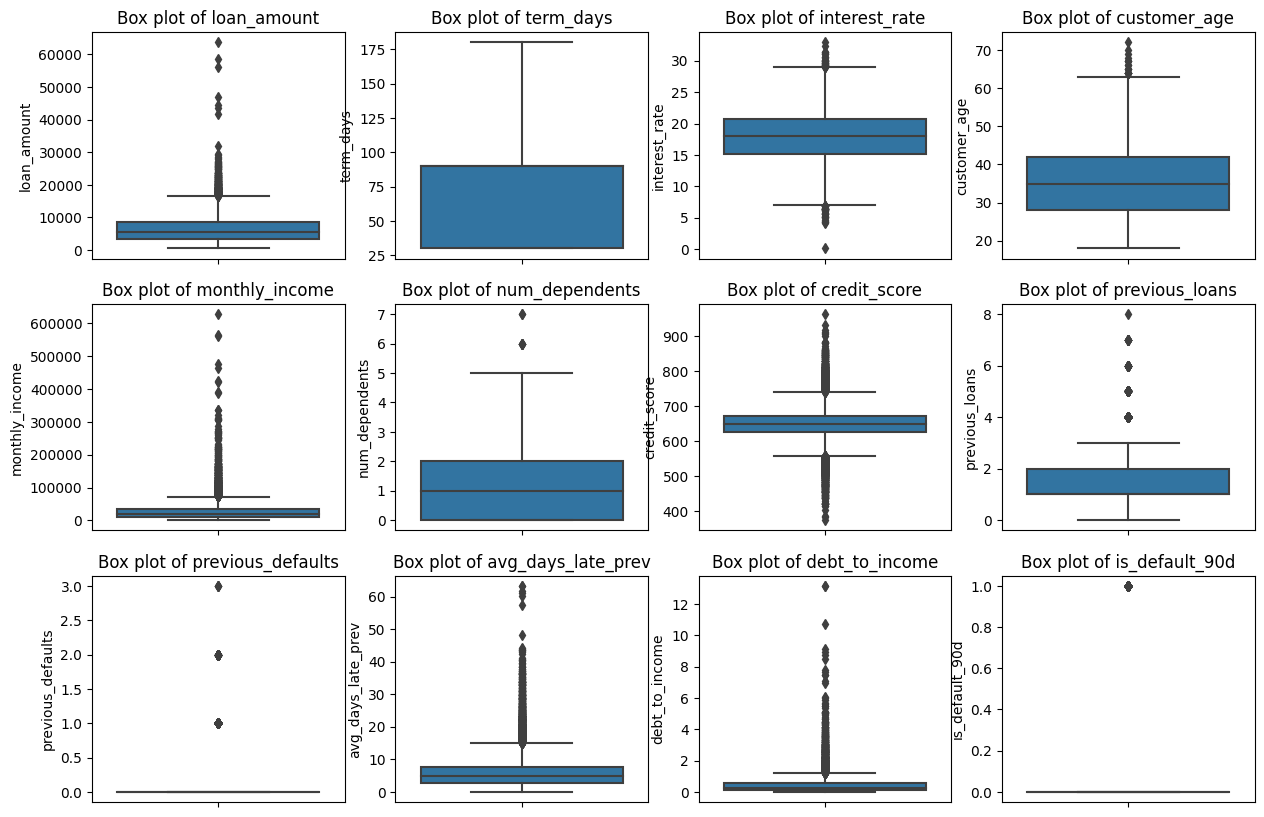

In [14]:
#outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}') 

is_default_90d
0    0.8999
1    0.1001
Name: proportion, dtype: float64

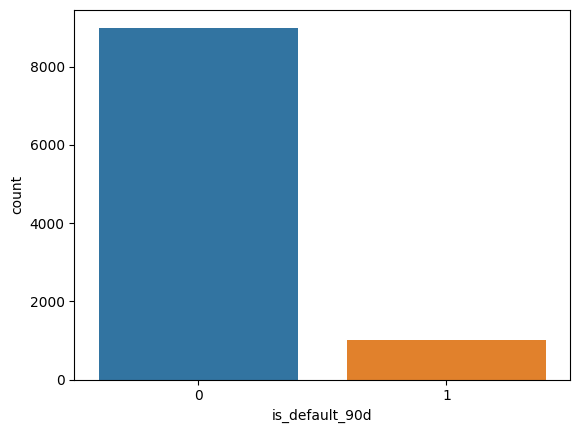

In [15]:
sns.countplot(x='is_default_90d',data=df)
plt.show

df['is_default_90d'].value_counts(normalize=True)

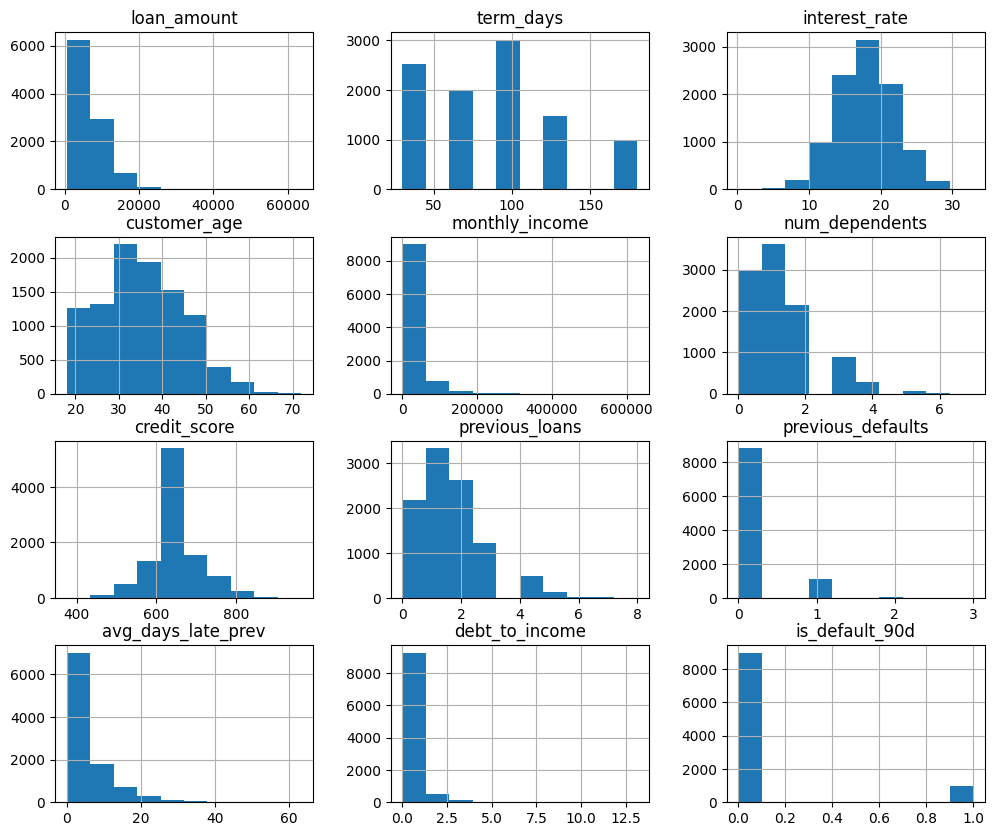

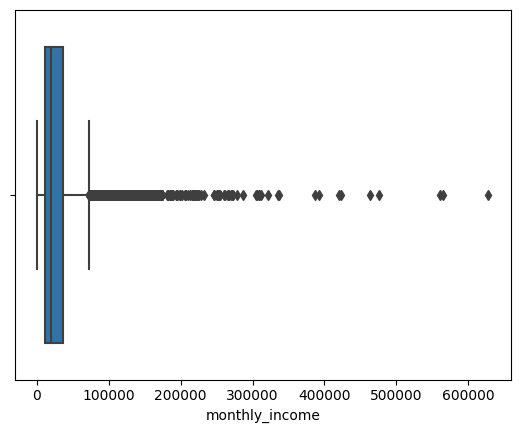

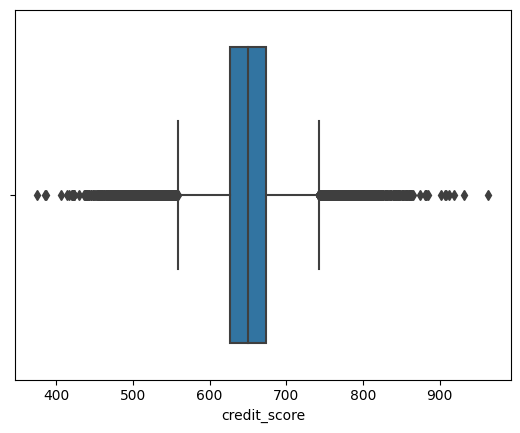

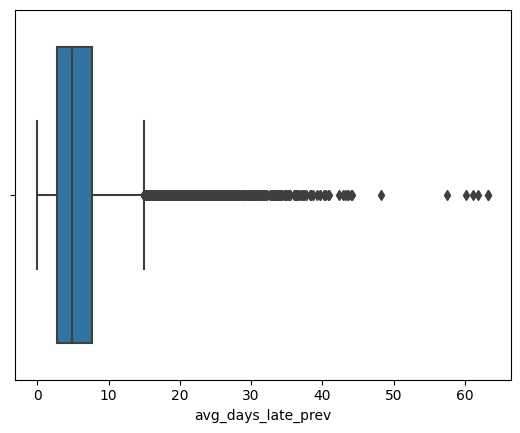

In [16]:
df.hist(figsize=(12,10))
plt.show()

for col in['monthly_income','credit_score','avg_days_late_prev']:
    sns.boxplot(x=df[col])
    plt.show()

In [17]:
print(df.dtypes)

for col in df.columns:
    if df[col].dtype != 'number':
        non_numeric=df[-df[col].apply(lambda x:str(x).replace('.','',1).isdigit())][col]
        if len(non_numeric)>0:
            print(f"{col} has non-numeric values: {non_numeric.unique()[:5]}")

loan_id                object
customer_id            object
loan_amount           float64
term_days               int64
disbursement_date      object
interest_rate         float64
repayment_schedule     object
customer_age            int64
customer_gender        object
customer_region        object
employment_type        object
monthly_income        float64
num_dependents          int64
credit_score          float64
previous_loans          int64
previous_defaults       int64
avg_days_late_prev    float64
device_type            object
channel                object
debt_to_income        float64
is_default_90d          int64
dtype: object
loan_id has non-numeric values: ['LN106252' 'LN104684' 'LN101731' 'LN104742' 'LN104521']
customer_id has non-numeric values: ['CUST200252' 'CUST204684' 'CUST201731' 'CUST204742' 'CUST204521']
disbursement_date has non-numeric values: ['27-04-2024 22:55' '23-05-2024 00:07' '13-09-2025 17:31'
 '12-06-2024 10:42' '03-09-2024 20:35']
repayment_schedule has n

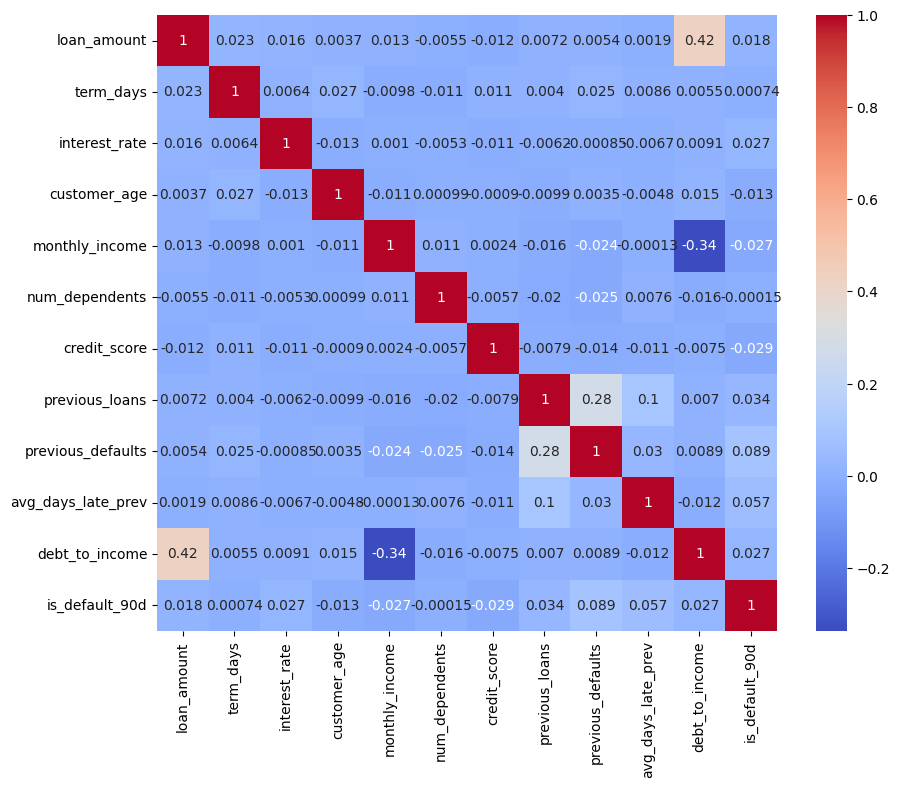

In [18]:
numeric_df=df.apply(pd.to_numeric, errors='coerce')
numeric_df=numeric_df.dropna(axis=1,how='all')


plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [20]:
for col in['monthly_income','credit_score','avg_days_late_prev']:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    df[col]=df[col].clip(lower,upper)

In [21]:
df['monthly_income_log']=np.log1p(df['monthly_income'])

In [22]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df['debt_payment_flag']=(df['avg_days_late_prev']>30).astype(int)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=df.select_dtypes(include='number').columns
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])